## **Task - 3: Wine Quality Prediction**



In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
wine_data = pd.read_csv("WineQT.csv")

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(wine_data.head())

First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1  

In [7]:
#calculating random forest accuracy
H = wine_data.drop('quality', axis=1)
p = wine_data['quality']
H_train, H_test, p_train, p_test = train_test_split(H, p, test_size=0.2, random_state=12)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(H_train, p_train)
rf_predictions = rf_classifier.predict(H_test)
rf_accuracy = accuracy_score(p_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.62882096069869


In [8]:
#Stocastic Gradient Descent Classifier Accuracy
sgd_classifier = SGDClassifier()
sgd_classifier.fit(H_train, p_train)
sgd_predictions = sgd_classifier.predict(H_test)
sgd_accuracy = accuracy_score(p_test, sgd_predictions)
print("Stocastic Gradient Descent Classifier Accuracy:", sgd_accuracy)

Stocastic Gradient Descent Classifier Accuracy: 0.3930131004366812


In [9]:
#svc classifier
svc_classifier = SVC()
svc_classifier.fit(H_train, p_train)
svc_predictions = svc_classifier.predict(H_test)
svc_accuracy = accuracy_score(p_test, svc_predictions)
print("Support Vector Classifier Accuracy:", svc_accuracy)

Support Vector Classifier Accuracy: 0.4366812227074236


In [14]:
#finding density
density_array = wine_data['density'].values
citric_acid_array = wine_data['citric acid'].values

In [15]:
#finding mean and standard deviation
mean_density = np.mean(density_array)
mean_citric_acid = np.mean(citric_acid_array)
std_density = np.std(density_array)
std_citric_acid = np.std(citric_acid_array)
print("\nStatistics for Density:")
print("Mean Density:", mean_density)
print("Standard Deviation Density:", std_density)
print("\nStatistics for Citric Acid:")
print("Mean Citric Acid:", mean_citric_acid)
print("Standard Deviation Citric Acid:", std_citric_acid)


Statistics for Density:
Mean Density: 0.9967304111986001
Standard Deviation Density: 0.001924224834379527

Statistics for Citric Acid:
Mean Citric Acid: 0.2683639545056868
Standard Deviation Citric Acid: 0.19659979421574741


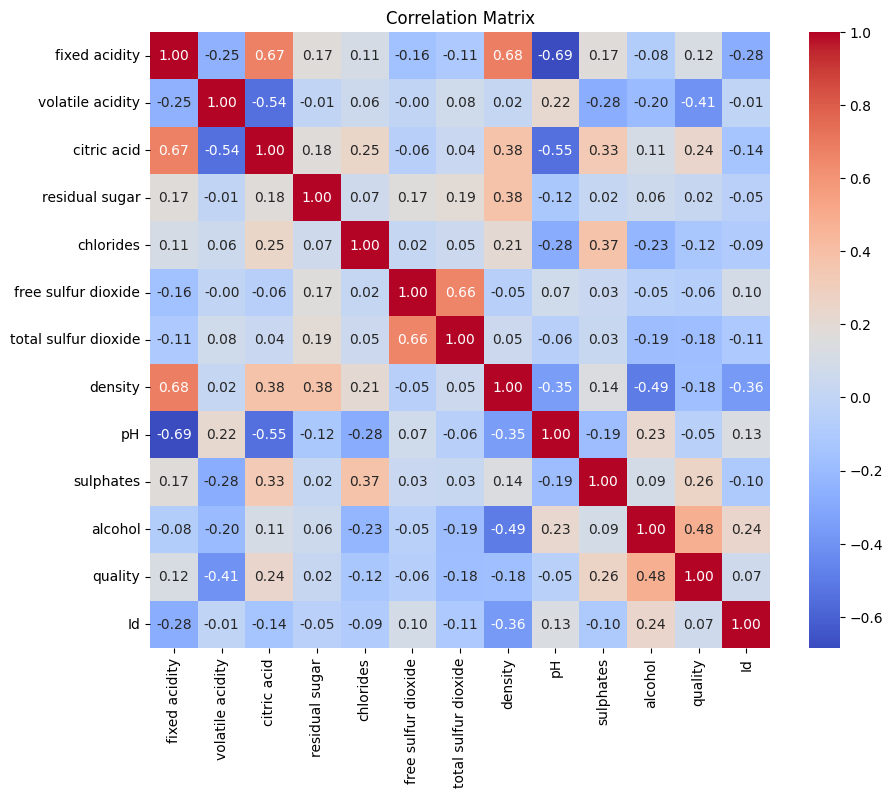

In [17]:
#data visualisation
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-48-9e89f79432a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(wine_data['quality'], palette='icefire')


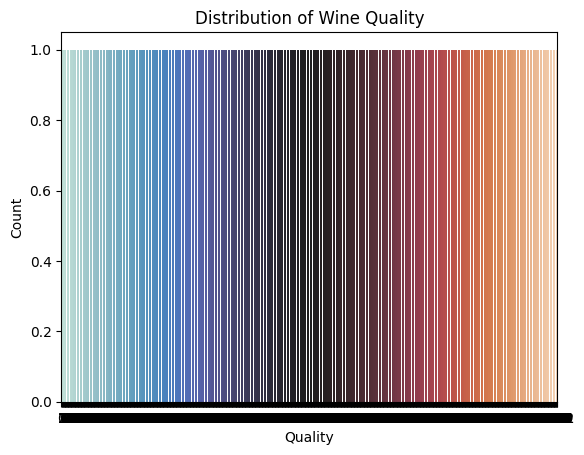

In [48]:
#countplot visulaisation
sns.countplot(wine_data['quality'], palette='icefire')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

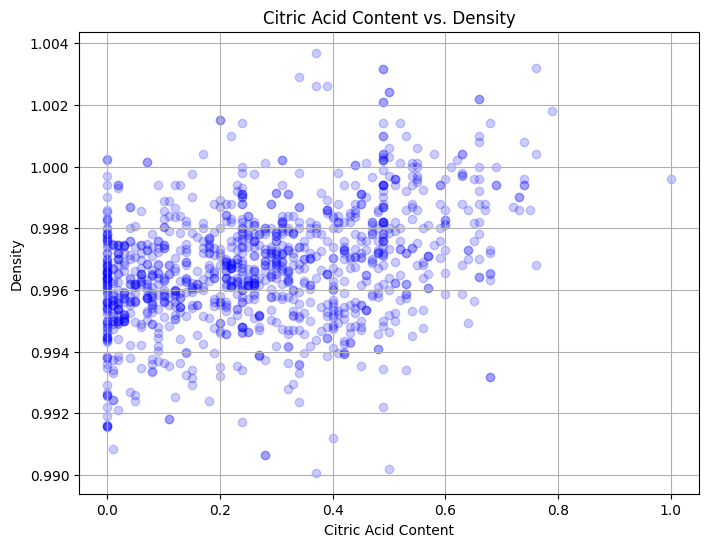

In [31]:
#scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(wine_data['citric acid'], wine_data['density'], alpha=0.2, color='blue')
plt.title('Citric Acid Content vs. Density')
plt.xlabel('Citric Acid Content')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<ipython-input-27-ac72768d7834>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_quality.index, y=avg_quality.values, palette='rocket')


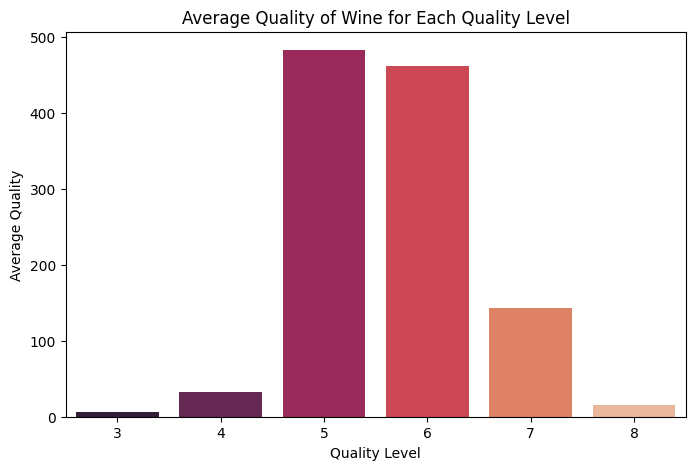

In [27]:
avg_quality = wine_data.groupby('quality')['quality'].count()
# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_quality.index, y=avg_quality.values, palette='rocket')
plt.title('Average Quality of Wine for Each Quality Level')
plt.xlabel('Quality Level')
plt.ylabel('Average Quality')
plt.show()

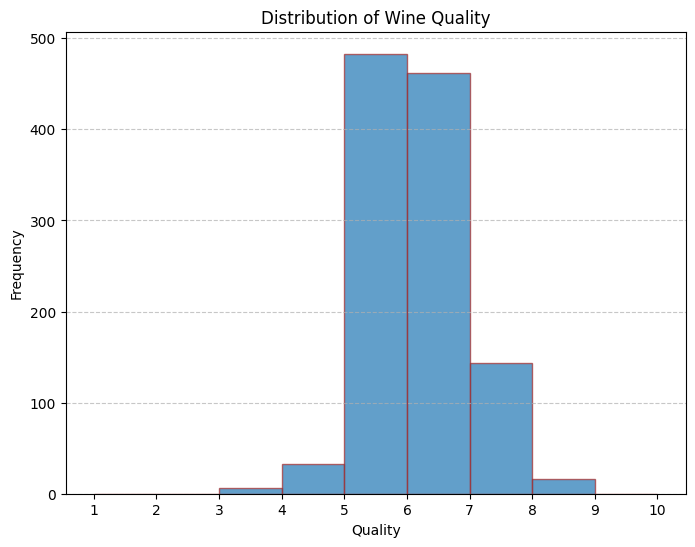

In [40]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(wine_data['quality'], bins=range(1, 11), edgecolor='Brown', alpha=0.7)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-47-c623855611f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='pH', data=wine_data, palette='cubehelix')


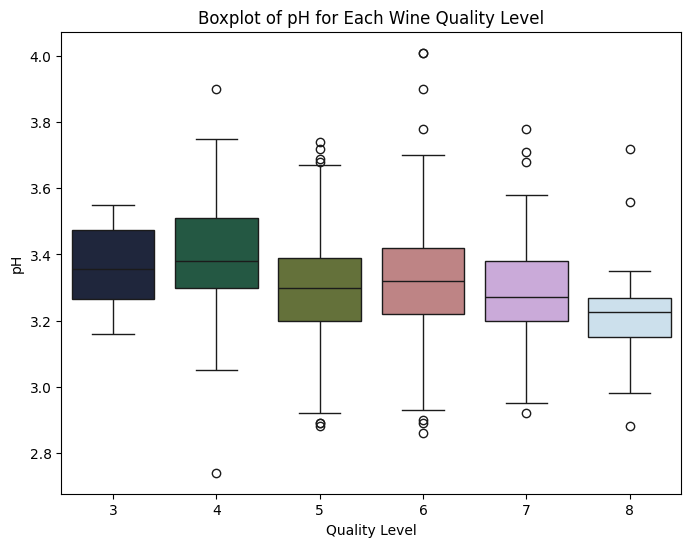

In [47]:
# Load the wine data into a Pandas DataFrame
wine_data = pd.read_csv("WineQT.csv")

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='pH', data=wine_data, palette='cubehelix')
plt.title('Boxplot of pH for Each Wine Quality Level')
plt.xlabel('Quality Level')
plt.ylabel('pH')
plt.show()